<a href="https://colab.research.google.com/github/Zeidh-Hassim/predictionPretrolConsumption/blob/main/Predict_petrol_comsumption_MultipleLineearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#2.Multiple Lineear Regression

**Task**: Predict petrol comsumption of a country given various factors such as tax, distance of highways and population with driving liscense

**Input**: Tax,distance of highways,average income and population with driving license

**Output**: Expected petrol consumption

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data= pd.read_csv('w1_petrol_consumption-220925-152435.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
data.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [ ]:
data.shape

(48, 5)

In [ ]:
data.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Petrol_tax,48.0,7.67,0.95,5.00,7.00,7.50,8.12,10.00
Average_income,48.0,4241.83,573.62,3063.00,3739.00,4298.00,4578.75,5342.00
Paved_Highways,48.0,5565.42,3491.51,431.00,3110.25,4735.50,7156.00,17782.00
Population_Driver_licence(%),48.0,0.57,0.06,0.45,0.53,0.56,0.60,0.72
Petrol_Consumption,48.0,576.77,111.89,344.00,509.50,568.50,632.75,968.00


In [ ]:
from matplotlib import pyplot as plt

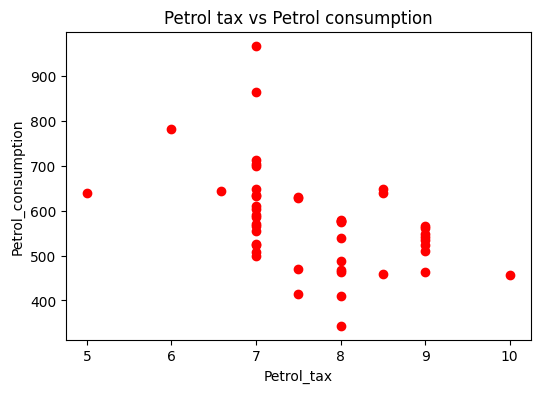

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(data.Petrol_tax, data.Petrol_Consumption, 'ro')
plt.title('Petrol tax vs Petrol consumption')
plt.xlabel('Petrol_tax')
plt.ylabel('Petrol_consumption')
plt.show()

Identify Outliers

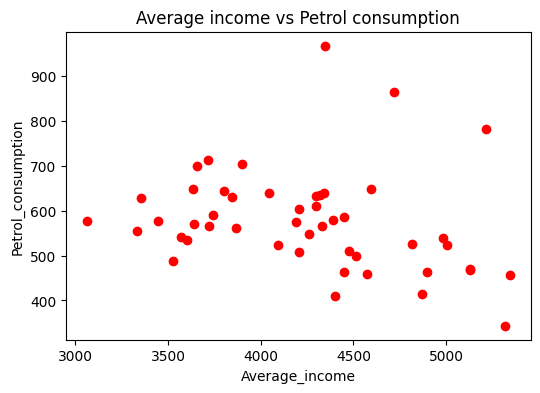

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(data.Average_income, data.Petrol_Consumption, 'ro')
plt.title('Average income vs Petrol consumption')
plt.xlabel('Average_income')
plt.ylabel('Petrol_consumption')
plt.show()

#Train the Model

In [ ]:
y = data.Petrol_Consumption
X = data.drop('Petrol_Consumption', axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.intercept_

361.45087906653225

In [ ]:
model.coef_

array([-3.69937459e+01, -5.65355145e-02, -4.38217137e-03,  1.34686930e+03])

#Make Prediction

In [ ]:
y_predict=model.predict(X_test)

In [ ]:
results= pd.DataFrame({'Actual':y_test, 'Predicted':y_predict})
print(results)

    Actual   Predicted
27     631  606.692665
40     587  673.779442
26     577  584.991490
43     591  563.536910
24     460  519.058672
37     704  643.461003
12     525  572.897614
19     640  687.077036
4      410  547.609366
25     566  530.037630


#Evaluating the Model

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
MAE= mean_absolute_error(y_test, y_predict)
MSE= mean_squared_error(y_test, y_predict)
RMSE= np.sqrt(MSE)

print(f'MAE: {MAE:.2f}')
print(f'MSE: {MSE:.2f}')
print(f'RMSE: {RMSE:.2f}')

MAE: 53.47
MSE: 4083.26
RMSE: 63.90


In [ ]:
model.score(X_test, y_test)

0.3913664001428886

In [ ]:
model.score(X_train, y_train)

0.7068781342155135